#Problem Statement:
Predicting Customer Churn in a Telecommunications Company

Background: Customer churn is a critical issue for telecommunications companies, as retaining customers is often more cost-effective than acquiring new ones. By analyzing customer data, we can identify patterns and factors that contribute to churn, allowing the company to take proactive measures to retain customers.

---






Objective: Develop a predictive model to identify customers who are likely to churn. By accurately predicting churn, the company can implement targeted retention strategies to reduce the churn rate and improve customer satisfaction.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [46]:
df.shape

(7043, 21)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [49]:
df.duplicated().sum()

0

In [50]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


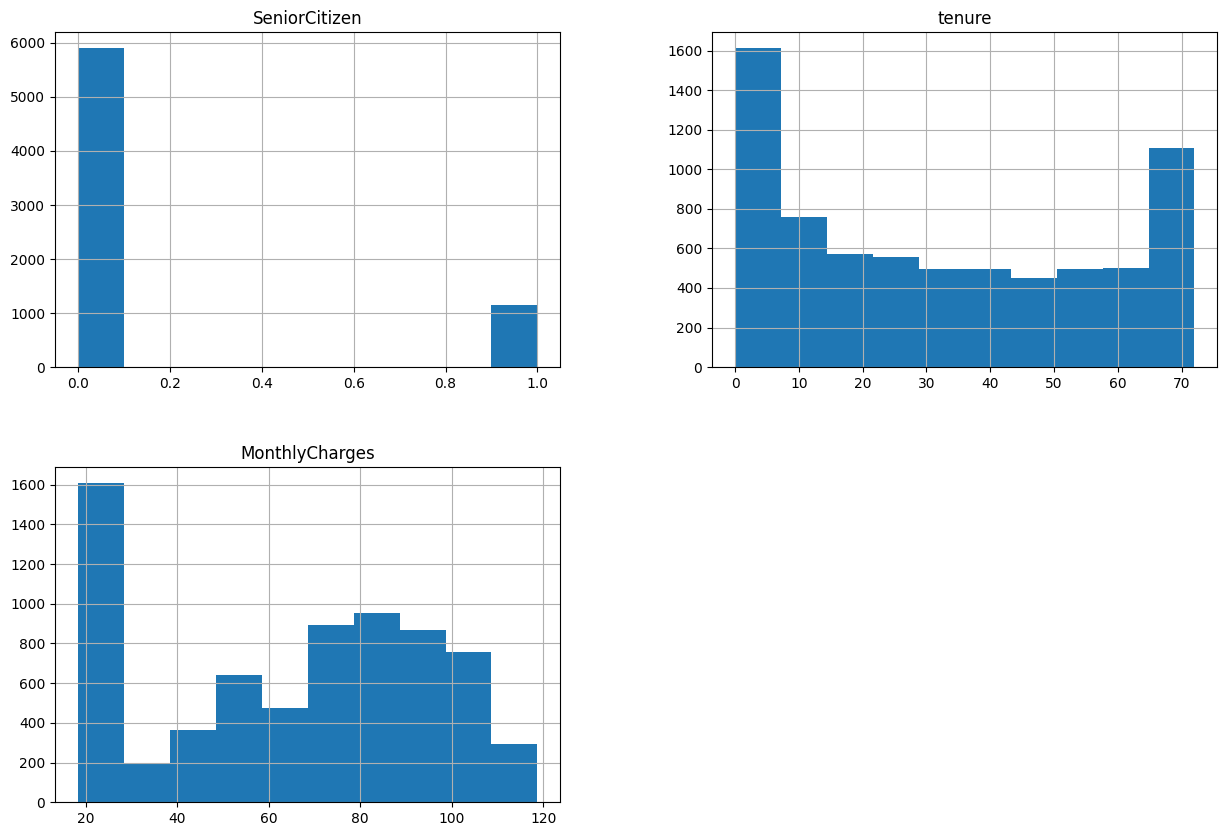

In [51]:
df.hist(figsize=(15,10))
plt.show()

In [52]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["Contract"].replace(["Month-to-month","One year","Two year"],[0,1,2],inplace=True)
df["customerID"]=labelencoder.fit_transform(df["customerID"])
df["Partner"]=labelencoder.fit_transform(df["Partner"])
df["Dependents"]=labelencoder.fit_transform(df["Dependents"])
df["PhoneService"]=labelencoder.fit_transform(df["PhoneService"])
df["MultipleLines"]=labelencoder.fit_transform(df["MultipleLines"])
df["InternetService"]=labelencoder.fit_transform(df["InternetService"])
df["OnlineSecurity"]=labelencoder.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"]=labelencoder.fit_transform(df["OnlineBackup"])
df["DeviceProtection"]=labelencoder.fit_transform(df["DeviceProtection"])
df["TechSupport"]=labelencoder.fit_transform(df["TechSupport"])
df["StreamingTV"]=labelencoder.fit_transform(df["StreamingTV"])
df["StreamingMovies"]=labelencoder.fit_transform(df["StreamingMovies"])
df["PaperlessBilling"]=labelencoder.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"]=labelencoder.fit_transform(df["PaymentMethod"])
df["Churn"]=labelencoder.fit_transform(df["Churn"])
df["gender"]=labelencoder.fit_transform(df["gender"])


<ipython-input-55-b7d7e02d3b54>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Contract"].replace(["Month-to-month","One year","Two year"],[0,1,2],inplace=True)
<ipython-input-55-b7d7e02d3b54>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Contract"].replace(["Month-to-month","One year",

In [56]:
#to convert string to numeric, this will attempt to convert the values in the "TotalCharges" column to numeric values.
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"]=df["TotalCharges"].astype("float64")
df["TotalCharges"]=df["TotalCharges"].fillna(0)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [58]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
x=df.drop("Churn",axis=1)
y=df["Churn"]
ros=SMOTE()
x_resampled,y_resampled=ros.fit_resample(x,y)
df=pd.concat([x_resampled,y_resampled],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [59]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.850000,29.850000,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.950000,1889.500000,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.850000,108.150000,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.300000,1840.750000,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.700000,151.650000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,3418,0,0,1,0,37,0,1,0,0,...,0,0,0,0,0,1,1,76.345236,2868.926640,1
10344,2068,0,0,0,0,65,1,2,1,0,...,1,0,0,0,1,0,1,91.641508,5992.839767,1
10345,1299,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,2,30.717844,30.717844,1
10346,3931,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,2,34.534812,34.534812,1


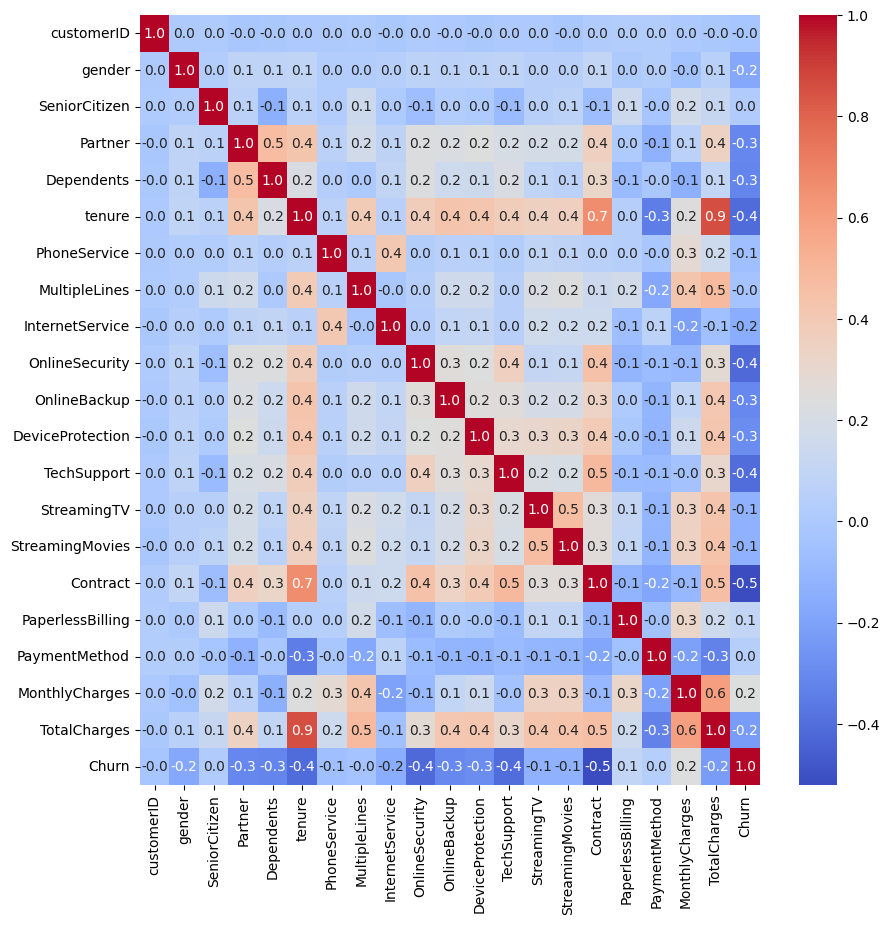

In [60]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt="0.01f")
plt.show()

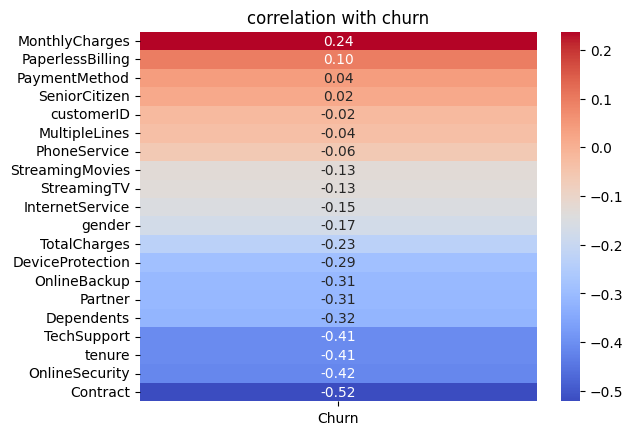

In [61]:
cor=df.corr()["Churn"].sort_values(ascending=False)
cor=cor.drop("Churn")
sns.heatmap(cor.to_frame(),annot=True,cmap="coolwarm",fmt="0.02f")
plt.title("correlation with churn")
plt.show()

In [62]:
df.drop("TotalCharges",axis=1,inplace=True)

In [63]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.850000,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.950000,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.850000,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.300000,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.700000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,3418,0,0,1,0,37,0,1,0,0,0,0,0,0,0,0,1,1,76.345236,1
10344,2068,0,0,0,0,65,1,2,1,0,2,1,0,0,0,1,0,1,91.641508,1
10345,1299,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,30.717844,1
10346,3931,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,34.534812,1


In [64]:
df.drop("PaperlessBilling",axis=1,inplace=True)
df.drop("PaymentMethod",axis=1,inplace=True)
df.drop("SeniorCitizen",axis=1,inplace=True)
df.drop("customerID",axis=1,inplace=True)
df.drop("MultipleLines",axis=1,inplace=True)
df.drop("PhoneService",axis=1,inplace=True)
df.drop("StreamingMovies",axis=1,inplace=True)
df.drop("InternetService",axis=1,inplace=True)
df.drop("StreamingTV",axis=1,inplace=True)
df.drop("gender",axis=1,inplace=True)

array([[<Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>],
       [<Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'Churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

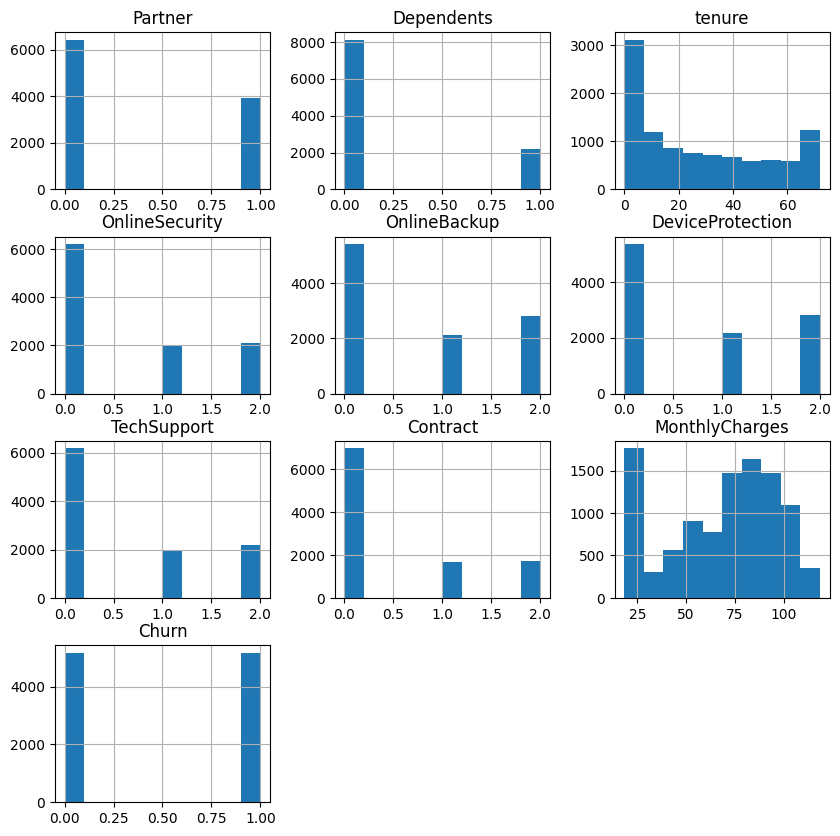

In [65]:
df.hist(figsize=(10,10))

In [66]:
df.skew()

,0
Partner,0.502665
Dependents,1.391026
tenure,0.498787
OnlineSecurity,0.832690
OnlineBackup,0.506384
DeviceProtection,0.494925
TechSupport,0.815094
Contract,1.149827
MonthlyCharges,-0.404245
Churn,0.000000


In [67]:
df["tenure"]=np.log1p(df["tenure"])
df["MonthlyCharges"]=np.log1p(df["MonthlyCharges"])

<Axes: >

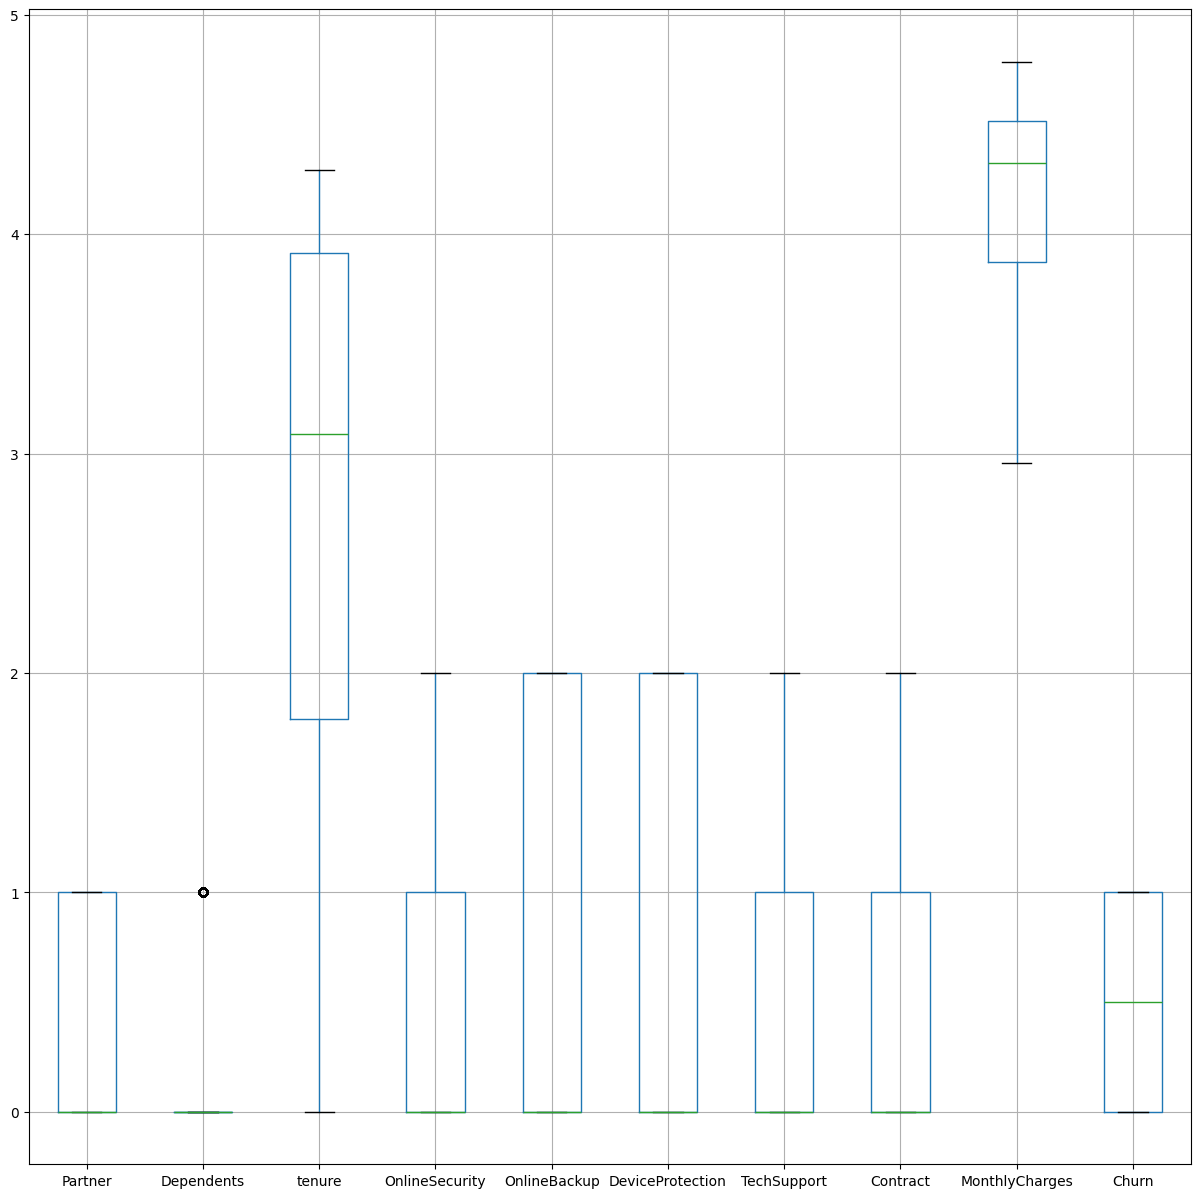

In [68]:
plt.figure(figsize=(15,15))
df.boxplot()

In [76]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

x=df.drop("Churn",axis=1)
y=df["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Define a dictionary of model
model={
    "LogisticRegression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "SVM":SVC(),
    "KNN":KNeighborsClassifier()
    }

#Train and evaluvete each model
for model_name,model in model.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'{model_name} accuracy: {accuracy:.2f}')

LogisticRegression accuracy: 0.81
Decision Tree accuracy: 0.77
Random Forest accuracy: 0.82
KNN accuracy: 0.82
SVM accuracy: 0.83


In [74]:
df["Churn"].value_counts()

,count
Churn,
0,5174
1,5174
